<a href="https://colab.research.google.com/github/biranchi2018/School_of_AI_KL/blob/master/sample_manglish_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Sat Jan 18 06:24:41 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.44       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8     9W /  70W |      0MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [2]:
!wget https://huseinhouse-storage.s3-ap-southeast-1.amazonaws.com/speech-sg/test-wav.tgz
!tar -zxf test-wav.tgz

--2020-01-18 06:27:51--  https://huseinhouse-storage.s3-ap-southeast-1.amazonaws.com/speech-sg/test-wav.tgz
Resolving huseinhouse-storage.s3-ap-southeast-1.amazonaws.com (huseinhouse-storage.s3-ap-southeast-1.amazonaws.com)... 52.219.32.35
Connecting to huseinhouse-storage.s3-ap-southeast-1.amazonaws.com (huseinhouse-storage.s3-ap-southeast-1.amazonaws.com)|52.219.32.35|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1373100976 (1.3G) [binary/octet-stream]
Saving to: ‘test-wav.tgz’

test-wav.tgz        100%[===================>]   1.28G  13.7MB/s    in 98s     

2020-01-18 06:29:30 (13.4 MB/s) - ‘test-wav.tgz’ saved [1373100976/1373100976]



In [3]:
!ls

sample_data  test-wav  test-wav.tgz


In [4]:
!ls test-wav/

220010004.WAV  221930201.WAV  224410261.WAV  226950296.WAV  229381758.WAV
220010013.WAV  221930203.WAV  224410272.WAV  226950313.WAV  229381770.WAV
220010050.WAV  221930205.WAV  224410273.WAV  226950340.WAV  229381795.WAV
220010054.WAV  221930217.WAV  224410293.WAV  226950346.WAV  229381812.WAV
220010129.WAV  221930228.WAV  224410329.WAV  226950365.WAV  229381838.WAV
220010205.WAV  221930279.WAV  224410344.WAV  226950373.WAV  229450095.WAV
220010223.WAV  221930283.WAV  224410350.WAV  226950388.WAV  229450110.WAV
220010244.WAV  221930296.WAV  224410379.WAV  226950391.WAV  229450117.WAV
220010246.WAV  221930328.WAV  224410391.WAV  226950435.WAV  229450144.WAV
220010253.WAV  221930343.WAV  224410397.WAV  226980006.WAV  229450153.WAV
220010265.WAV  221930363.WAV  224410421.WAV  226980016.WAV  229450159.WAV
220010317.WAV  221930364.WAV  224410439.WAV  226980068.WAV  229450174.WAV
220010328.WAV  221930419.WAV  224411450.WAV  226980086.WAV  229450179.WAV
220010334.WAV  221931453.WAV  22441149

In [0]:
from glob import glob
import pandas as pd

wavs = glob('test-wav/*.WAV')
csv = 'test-wav/notes.csv'


In [6]:
df = pd.read_csv(csv)
df.head()

,wav_filename,wav_filesize,transcript
0,221930043.WAV,219052,b r sreenivasan ho see beng and sai hua kuan
1,221930091.WAV,172204,p c show kiki and kinohimitsu
2,221931702.WAV,149804,wantan mee is a traditional local cuisine
3,221930052.WAV,195276,antonia recently opened a new hainanese curry ...
4,221931492.WAV,155372,three two seven four nine six three zero


In [7]:
import IPython.display as ipd
ipd.Audio('test-wav/221930091.WAV')

In [8]:
df.shape

(13189, 3)

In [9]:
sample_500 = df.sample(500)
sample_500.shape

(500, 3)

In [10]:
!pip3 install youtokentome

     |████████████████████████████████| 1.7MB 2.9MB/s 


In [0]:
import youtokentome as yttm
model_path = "example.model"

labels = sample_500['transcript'].tolist()
with open('labels.txt', 'w') as fopen:
  fopen.write('\n'.join(labels))

yttm_model = yttm.BPE.train(data='labels.txt', 
               vocab_size=1000, model=model_path)

In [13]:
yttm_model.encode(['i want to makan ciken'], 
                  output_type=yttm.OutputType.SUBWORD)

[['▁i', '▁want', '▁to', '▁m', 'ak', 'an', '▁c', 'i', 'ken']]

In [0]:
labels_subwords = yttm_model.encode(labels, 
                  output_type=yttm.OutputType.SUBWORD)

labels_id = yttm_model.encode(labels, 
                  output_type=yttm.OutputType.ID)

In [15]:
labels_subwords[0], labels_id[0]

(['▁kueh',
  '▁talam',
  '▁tepong',
  '▁pandan',
  '▁dr',
  'un',
  'ken',
  '▁prawns',
  '▁and',
  '▁kw',
  'et',
  'ia',
  'u',
  '▁goreng'],
 [359, 566, 760, 888, 428, 97, 233, 722, 48, 372, 85, 192, 16, 659])

In [0]:
import librosa

In [17]:
w, sr = librosa.load('test-wav/221930091.WAV')
w.shape


(118629,)

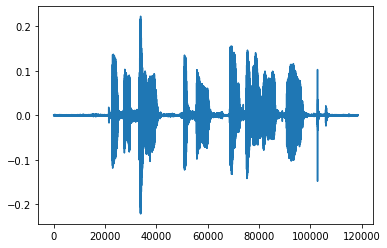

In [18]:
import matplotlib.pyplot as plt
plt.plot(w)

In [0]:
import numpy as np

sampling_rate = 22050
n_fft = 2048
frame_shift = 0.0125
frame_length = 0.05
hop_length = int(sampling_rate * frame_shift)
win_length = int(sampling_rate * frame_length)
n_mels = 80

def get_spectrogram(fpath):
    y, sr = librosa.load(fpath, sr = sampling_rate)
    D = librosa.stft(
        y = y, 
        n_fft = n_fft, 
        hop_length = hop_length, win_length = win_length
    )
    magnitude = np.abs(D)
    power = magnitude ** 2
    S = librosa.feature.melspectrogram(S = power, 
                                       n_mels = n_mels)
    
    return np.transpose(S.astype(np.float32))

    # in db scale
    # return np.transpose(np.log10(magnitude.astype(np.float32)) * 10)

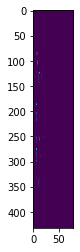

In [21]:
spec = get_spectrogram('test-wav/221930091.WAV')
spec.shape

plt.imshow(spec)

In [22]:
from tqdm import tqdm

mels = []
for i in tqdm(range(len(sample_500))):
  filename = sample_500['wav_filename'].iloc[i]
  spec = get_spectrogram('test-wav/%s'%(filename))
  mels.append(spec)

100%|██████████| 500/500 [01:39<00:00,  4.76it/s]


In [23]:
import tensorflow as tf

In [0]:
class Model:
  def __init__(self, size, num_layers, learning_rate):
    self.X = tf.placeholder(tf.float32, 
                            (None, None, mels[0].shape[1]))
    self.label = tf.placeholder(tf.int32, [None, None])
    self.Y_seq_len = tf.placeholder(tf.int32, [None])
    self.Y = tf.sparse_placeholder(tf.int32)

    seq_lens = tf.count_nonzero(
          tf.reduce_sum(self.X, -1), 1, dtype = tf.int32
      )
    
    def cells(size, reuse = False):
      return tf.nn.rnn_cell.LSTMCell(
              size,
              initializer = tf.orthogonal_initializer(),
              reuse = reuse,
      )
    
    features = self.X
    rnn_cells = tf.nn.rnn_cell.MultiRNNCell(
        [cells(size) for _ in range(num_layers)])
    
    outputs, _ = tf.nn.dynamic_rnn(rnn_cells, 
                                   features, 
                                   dtype = tf.float32)
    logits = tf.layers.dense(features, 1000)
    # logits b, t, d -> t, b, d
    time_major = tf.transpose(logits, [1, 0, 2])
    decoded, log_prob = tf.nn.ctc_greedy_decoder(time_major, seq_lens)
    decoded = tf.to_int32(decoded[0])
    self.preds = tf.sparse.to_dense(decoded)
    self.cost = tf.reduce_mean(
        tf.nn.ctc_loss(
            self.Y,
            time_major,
            seq_lens
        )
    )
    self.optimizer = tf.train.AdamOptimizer(
        learning_rate = learning_rate
    ).minimize(self.cost)
    

In [0]:
tf.reset_default_graph()
sess = tf.InteractiveSession()


In [0]:
size_layers = 256
learning_rate = 1e-3
num_layers = 2
batch_size = 64
epoch = 5

In [27]:
model = Model(size = size_layers, 
              num_layers = num_layers, 
              learning_rate = learning_rate)
sess.run(tf.global_variables_initializer())

Instructions for updating:
reduction_indices is deprecated, use axis instead
Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
This class is equivalent as tf.keras.layers.StackedRNNCells, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
Use `tf.cast` instead.


In [0]:
padding = tf.keras.preprocessing.sequence.pad_sequences


In [30]:
batch_x = mels[:batch_size]
batch_x = padding(batch_x, padding='post')
np.array(batch_x).shape


(64, 883, 80)

In [31]:
batch_y = labels_id[:batch_size]
batch_y = padding(batch_y, padding='post')
np.array(batch_y).shape

(64, 28)

In [33]:
def sparse_tuple_from(sequences, dtype=np.int32):
    indices = []
    values = []

    for n, seq in enumerate(sequences):
        indices.extend(zip([n] * len(seq), range(len(seq))))
        values.extend(seq)

    indices = np.asarray(indices, dtype=np.int64)
    values = np.asarray(values, dtype=dtype)
    shape = np.asarray([len(sequences), np.asarray(indices).max(0)[1] + 1], dtype=np.int64)

    return indices, values, shape

sparse_y = sparse_tuple_from(batch_y)
len(sparse_y)

3